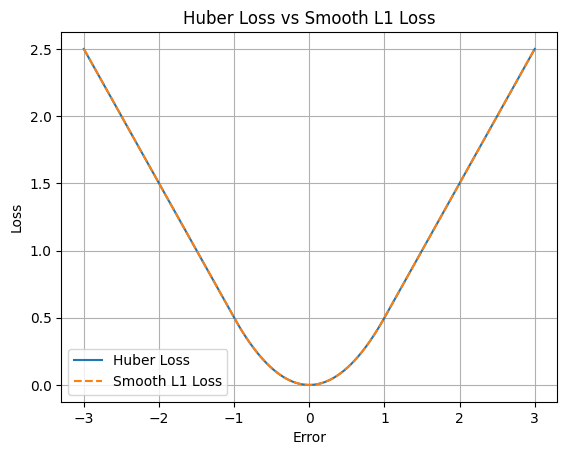

In [1]:
from data_preparation.dataset_preparation import TauPreparer
import os
from data_preparation import data_utils

In [11]:
import tqdm


in_root_dir = "M:/Unused/TauCellDL/labels/test"

detection_files = data_utils.list_files_of_a_type(in_root_dir, "txt")

d = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}
object_labels = {}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None:
        continue
    if key not in object_labels:
        object_labels[key] = {}
    with open(detection_file, 'r') as detections:
        for line in detections:
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                object_labels[key][object_label] = object_labels[key].get(object_label, 0) + 1


0it [00:00, ?it/s]


In [18]:
import tqdm
import os

in_root_dir = "M:/Unused/TauCellDL/test_labels_new"

detection_files = data_utils.list_files_of_a_type(in_root_dir, "txt")

d = {
     "cortical": ['747331','771747'],
     "BG": ['703488', '747821'],
     "DN": ['747335','771913']
}
object_labels = {}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None:
        continue
    if key not in object_labels:
        object_labels[key] = {}
    with open(detection_file, 'r') as detections:
        for line in detections:
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                object_labels[key][object_label] = object_labels[key].get(object_label, 0) + 1


  0%|          | 0/6 [00:00<?, ?it/s]


Processing slide 747335...


 17%|█▋        | 1/6 [00:04<00:20,  4.13s/it]


Processing slide 771747...


 33%|███▎      | 2/6 [00:25<00:56, 14.10s/it]


Processing slide 747331...


 50%|█████     | 3/6 [00:30<00:29,  9.87s/it]


Processing slide 703488...


 67%|██████▋   | 4/6 [00:39<00:19,  9.63s/it]


Processing slide 747821...


 83%|████████▎ | 5/6 [00:47<00:09,  9.12s/it]


Processing slide 771913...


100%|██████████| 6/6 [00:51<00:00,  8.55s/it]


In [19]:
object_labels


{'DN': {'3': 919, '2': 44, '1': 24},
 'cortical': {'1': 355, '3': 1914, '0': 369, '2': 106},
 'BG': {'3': 3064, '1': 199, '0': 82, '2': 33}}

In [37]:
# for files in cortical and DN regions, filter out all objects with label 'tau_fragments'
in_root_dir = "M:/Unused/TauCellDL/labels_new"

detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")

d = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None or key != "BG":
        continue
    lines = []
    with open(detection_file, 'r') as detections:
        for line in detections:     
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                if object_label == "CB":
                     continue
                else:
                     lines.append(line)
    with open(detection_file, 'w') as f:
        for line in lines:
            f.write(line)
                     


0it [00:00, ?it/s]


In [38]:
# for files in cortical and DN regions, rename label 'Others' to 'tau_fragments'
in_root_dir = "M:/Unused/TauCellDL/labels_new"

detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")

d = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None or key == "BG":
        continue
    lines = []
    with open(detection_file, 'r') as detections:
        for line in detections:     
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                if object_label == "Others":
                    object_label = "tau_fragments"
                lines.append(object_label + ":" + line.split(':')[1])
    with open(detection_file, 'w') as f:
        for line in lines:
            f.write(line)
                     


0it [00:00, ?it/s]


In [39]:
# for files in cortical and DN regions, rename label 'Others' to 'tau_fragments'
in_root_dir = "M:/Unused/TauCellDL/labels_new"

detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")

d = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None or key != "BG":
        continue
    lines = []
    with open(detection_file, 'r') as detections:
        for line in detections:     
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                if object_label == "coiled":
                    object_label = "CB"
                lines.append(object_label + ":" + line.split(':')[1])
    with open(detection_file, 'w') as f:
        for line in lines:
            f.write(line)
                     


0it [00:00, ?it/s]


In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import seaborn as sns

def get_object_sizes_by_region():
    in_root_dir = "M:/Unused/TauCellDL/labels_new"
    detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")
    
    # Dictionary to store sizes: region -> class -> list of sizes
    sizes = {}
    
    d = {
         "cortical": ['747316', '771746', '771791'],
         "BG": ['747814', '747818', '747297', '747309'],
         "DN": ['747337','747350','747352']
    }
    
    for detection_file in detection_files:
        split_filename = data_utils.get_filename(detection_file).split('_')
        slide_id = split_filename[0]
        # find key for slide_id
        key = next((key for key, value in d.items() if slide_id in value), None)
        if key is None:
            continue
        if key not in sizes:
            sizes[key] = {}
            
        with open(detection_file, 'r') as f:
            for line in f:
                parts = line.strip().split(':')
                if len(parts) != 2:
                    continue
                    
                object_label = parts[0].strip().strip(']').strip('[')
                bbox = (parts[1].split(' ',2))[2].strip().strip('(').strip(')')
                # Parse bbox coordinates (assuming format: x,y,w,h)
                try:
                    coords = [int(x) for x in bbox.split(',')]
                    print(coords)
                    if len(coords) >= 4:
                        area = math.sqrt(coords[2] * coords[3])  # width * height
                        if object_label not in sizes[key]:
                            sizes[key][object_label] = []
                        sizes[key][object_label].append(area)
                except Exception as e:
                    # print error
                    print(e)

                    continue
    
    return sizes

def plot_size_distributions(sizes):
    # Set up the plot style
    sns.set_palette("husl")
    
    # Create subplots for each region
    regions = list(sizes.keys())
    fig, axes = plt.subplots(len(regions), 1, figsize=(12, 5*len(regions)))
    fig.suptitle('Object Size Distributions by Region and Class', fontsize=16)
    
    for idx, region in enumerate(regions):
        ax = axes[idx] if len(regions) > 1 else axes
        
        # Prepare data for boxplot
        data = []
        labels = []
        for class_name, class_sizes in sizes[region].items():
            if len(class_sizes) > 0:  # Only include if we have data
                data.append(class_sizes)
                labels.append(f"{class_name}\n(n={len(class_sizes)})")
        
        # Create box plot
        ax.boxplot(data, labels=labels)
        ax.set_title(f'{region} Region')
        ax.set_ylabel('Object Area (pixels²)')
        ax.set_yscale('log')  # Log scale often works better for size distributions
        
        # Add some grid lines
        ax.grid(True, linestyle='--', alpha=0.7)
        
    plt.tight_layout()
    plt.show()

# Execute the visualization
sizes = get_object_sizes_by_region()
sizes

{}

In [41]:
# plot by type of label
def plot_size_distributions_by_label(sizes):
    labels = {}
    for type_object in sizes["cortical"].keys():
        labels[type_object] = []
    for dic in sizes.values():
        for type_object in dic.keys():
            if type_object not in labels:
                labels["CB"].extend(dic[type_object])
            else:
                labels[type_object].extend(dic[type_object])
    
    plt.figure(figsize=(10, 6))
    means = []
    label_names = []
    for label, values in labels.items():
        mean_value = np.mean(values)
        means.append(mean_value)
        label_names.append(label)
        print(f"{label}: {mean_value}")
    
    plt.bar(label_names, means)
    # Or if you really want a histogram:
    # plt.hist(means, bins=len(means), alpha=0.7, label='Labels')
    
    plt.xlabel('Label Type')
    plt.ylabel('Mean Size')
    plt.title('Mean Size by Label Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [42]:
plot_size_distributions(sizes)
# plot_size_distributions_by_label(sizes)

# Optional: Print summary statistics
for region, class_sizes in sizes.items():
    print(f"\n{region} Region Statistics:")
    for class_name, size_list in class_sizes.items():
        if len(size_list) > 0:
            print(f"\n{class_name}:")
            print(f"  Count: {len(size_list)}")
            print(f"  Mean: {np.mean(size_list):.2f}")
            print(f"  Median: {np.median(size_list):.2f}")
            print(f"  Std: {np.std(size_list):.2f}")
            print(f"  Min: {np.min(size_list):.2f}")
            print(f"  Max: {np.max(size_list):.2f}")

# output summary statistics to a csv file, include the column names too 
with open("M:/Unused/TauCellDL/object_size_statistics.csv", "w") as f:
    f.write("Region,Class,Mean,Median,Std,Min,Max\n")
    for region, class_sizes in sizes.items():
        for class_name, size_list in class_sizes.items():
            f.write(f"{region},{class_name},{np.mean(size_list):.2f},{np.median(size_list):.2f},{np.std(size_list):.2f},{np.min(size_list):.2f},{np.max(size_list):.2f}\n")


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1200x0 with 0 Axes>

In [118]:
from data_preparation.dataset_preparation import TauPreparer
in_root_dir = "M:/Unused/TauCellDL"

data_preparer = TauPreparer(in_root_dir=in_root_dir, in_img_dir="images", in_label_dir="labels",
                            prepared_root_dir=in_root_dir, prepared_img_dir="images_new", prepared_label_dir="labels_new")
data_preparer.prepare_labels_for_yolo()

Processing region 

Creating filtered detection lists...


  0%|          | 0/10 [00:00<?, ?it/s]



Processing M:/Unused/TauCellDL\labels\747297_detections.txt...

Separating labels by tile for each slide...


  0%|          | 0/10 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [116]:
data_preparer.separate_tiles_with_cut_log()


AttributeError: 'TauPreparer' object has no attribute 'separate_tiles_with_cut_log'

In [ ]:
from collections import defaultdict

from data_preparation import data_utils, image_labelling


def count_objects(dataset_preparer):
        """
        Print the number of images in each directory in the prepared image directory,
            along with the number of objects per image.
        """
        root_img_dir = "M:/Unused/TauCellDL/images"
        root_label_dir = os.path.join(
            data_preparer.prepared_root_dir, data_preparer.prepared_label_dir)

        sets = [f for f in os.listdir(root_img_dir)]

        for set_name in sets:
            num_objects_per_class = defaultdict(int)

            img_dir = os.path.join(root_img_dir, set_name)
            label_dir = os.path.join(root_label_dir, set_name)

            img_paths = data_utils.list_files_of_a_type(img_dir, ".png")

            for img_path in img_paths:
                img_name = data_utils.get_filename(img_path)
                label_path = os.path.join(label_dir, img_name + ".txt")

                bboxes, labels = image_labelling.bboxes_from_yolo_labels(
                    label_path)

                for l in labels:
                    num_objects_per_class[l] += 1

            print(
                f"Objects per class in set {set_name} : {num_objects_per_class}")
            print(f"Number of images in set {set_name}: {len(img_paths)}")
            num_objects_per_class.clear()

In [52]:
dict = {
    'BG': {},
    'cortical': {},
    'DN': {}
}
from data_preparation import data_utils
import tqdm


In [33]:
slide_to_area = {
    '703488': 'BG',
    '747821': 'BG',
    '747331': 'cortical',
    '771747': 'cortical',
    '747335': 'DN',
    '771913': 'DN'
}

In [53]:
def separate_tiles_with_cut_log():
        detection_files = data_utils.list_files_of_a_type("M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical", ".txt")

        for i in tqdm.tqdm(range(len(detection_files))):
            detection_file = detection_files[i]
            print(f"\nProcessing {detection_file}...")
            with open(detection_file, 'r') as f:   
                slide_id = data_utils.get_filename(detection_file).split('.')[0].split('_')[0]
                area = slide_to_area[slide_id]
                for line in f:
                    if line.split(':')[0].strip().strip(']').strip('[') != "Unlabelled":
                        if line.split(':')[0].strip().strip(']').strip('[') not in dict[area]:
                            dict[area][line.split(':')[0].strip().strip(']').strip('[')] = 1
                        else:
                            dict[area][line.split(':')[0].strip().strip(']').strip('[')] += 1
separate_tiles_with_cut_log()

  0%|          | 0/4 [00:00<?, ?it/s]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\747331_Annelies_.txt...


 25%|██▌       | 1/4 [00:00<00:01,  2.21it/s]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\747331_Tanrada_5%_May.txt...


 50%|█████     | 2/4 [00:00<00:00,  2.77it/s]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\771747_Annelies.txt...


 75%|███████▌  | 3/4 [00:16<00:07,  7.33s/it]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\771747_Tanrada_5%_May.txt...


100%|██████████| 4/4 [00:37<00:00,  9.38s/it]


In [28]:
# search all subdirectories in M:\Tanrada\Validation\Training_DN\data, and see if any server.json file contains the string 'svs_Tanrada_2'
import os

root_dir = "M:/Tanrada/Validation/Training_DN/data"

for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith("server.json"):
            with open(os.path.join(root, file), 'r') as f:
                if "svs_Tanrada_2" in f.read():
                    print(os.path.join(root, file))



M:/Tanrada/Validation/Training_DN/data\377\server.json
M:/Tanrada/Validation/Training_DN/data\378\server.json


find 1 train slide for each brain region (BG, cortical, dn) that contains the object distribution closest to the test distribution

In [2]:
import pandas as pd
df_train = pd.read_excel("M:/Unused/TauCellDL/statistics (version 1).xlsx", sheet_name="Sheet1")
df_test = pd.read_excel("M:/Unused/TauCellDL/object_size_statistics (version 1).xlsx", sheet_name="Sheet2")

In [3]:
df_train

,slide_id,class,kept,Region
0,747297,TA,11,bg
1,747297,CB,157,bg
2,747297,NFT,64,bg
3,747297,Tau_fragments,1023,bg
4,747309,TA,155,bg
5,747309,CB,381,bg
6,747309,NFT,19,bg
7,747309,Tau_fragments,5743,bg
8,747316,TA,134,cortical
9,747316,CB,257,cortical


In [4]:
df_test

,Unnamed: 0,BG,Cortical,DN
0,cb,159,296,18
1,NFT,21,78,32
2,TA,49,237,0
3,tau_fragments,2796,1761,845


In [12]:
def calculate_vertical_ratios(df_train, df_test, val_slide):
    """Calculate train:val:test ratios when using a specific validation slide"""
    # Initialize distributions
    train_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    val_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    test_dist = {'CB': 159, 'NFT': 21, 'TA': 49, 'Tau_fragments': 2796}
    
    # Split data into train and validation
    val_data = df_train[df_train['slide_id'] == val_slide]
    train_data = df_train[df_train['slide_id'] != val_slide]
    
    # Calculate raw counts
    for _, row in train_data.iterrows():
        train_dist[row['class']] += row['kept']
    
    for _, row in val_data.iterrows():
        val_dist[row['class']] += row['kept']
    
    # Calculate similarity scores
    train_sim = get_distribution_similarity(train_dist, test_dist)
    val_sim = get_distribution_similarity(val_dist, test_dist)
    
    # Calculate ratios for each class (relative to test set)
    ratios = {}
    for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
        test_count = test_dist[class_name]
        if test_count == 0:
            ratios[class_name] = {
                'train': 0 if train_dist[class_name] == 0 else float('inf'),
                'val': 0 if val_dist[class_name] == 0 else float('inf'),
                'test': 1
            }
        else:
            ratios[class_name] = {
                'train': train_dist[class_name] / test_count,
                'val': val_dist[class_name] / test_count,
                'test': 1  # test is our reference point
            }
    
    return ratios, train_dist, val_dist, test_dist, train_sim, val_sim

# Calculate distributions for each potential validation slide
results = {}
for region in ['bg', 'cortical', 'dn']:
    region_slides = df_train[df_train['Region'] == region]['slide_id'].unique()
    region_results = {}
    
    for slide_id in region_slides:
        ratios, train_counts, val_counts, test_counts, train_sim, val_sim = calculate_vertical_ratios(df_train, df_test, slide_id)
        region_results[slide_id] = {
            'ratios': ratios,
            'train_counts': train_counts,
            'val_counts': val_counts,
            'test_counts': test_counts,
            'train_sim': train_sim,
            'val_sim': val_sim
        }
    
    results[region] = region_results

# Print results
for region, region_results in results.items():
    print(f"\nRegion: {region.upper()}")
    print("-" * 100)
    
    for slide_id, data in region_results.items():
        print(f"\nSlide: {slide_id}")
        print(f"Similarity Scores - Train:Test: {data['train_sim']:.3f}, Val:Test: {data['val_sim']:.3f}")
        print("\nClass          Train:Val:Test                Raw Counts (Train/Val/Test)")
        print("-" * 75)
        
        ratios = data['ratios']
        total_train = 0
        total_val = 0
        total_test = 0
        
        for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
            ratio_str = f"{ratios[class_name]['train']:.1f}:{ratios[class_name]['val']:.1f}:1"
            counts_str = f"{data['train_counts'][class_name]}/{data['val_counts'][class_name]}/{data['test_counts'][class_name]}"
            print(f"{class_name:<13} {ratio_str:<20} ({counts_str})")
            
            total_train += data['train_counts'][class_name]
            total_val += data['val_counts'][class_name]
            total_test += data['test_counts'][class_name]
        
        print(f"\nTotal Counts - Train: {total_train}, Val: {total_val}, Test: {total_test}")
        print(f"Overall Ratio - {total_train/total_test:.1f}:{total_val/total_test:.1f}:1")
        print("-" * 75)

# Find best validation slide based on combination of ratio and similarity scores
def calculate_combined_score(data, target_train=4.7, target_val=1):
    """Calculate score based on both ratio proximity and distribution similarity"""
    ratio_score = 0
    for class_ratios in data['ratios'].values():
        if class_ratios['train'] != float('inf'):
            ratio_score -= abs(class_ratios['train'] - target_train)
        if class_ratios['val'] != float('inf'):
            ratio_score -= abs(class_ratios['val'] - target_val)
    
    similarity_score = (data['train_sim'] + data['val_sim']) / 2
    return ratio_score + similarity_score

for region, region_results in results.items():
    best_slide = max(region_results.items(), 
                    key=lambda x: calculate_combined_score(x[1]))
    
    print(f"\nBest validation slide for {region}: {best_slide[0]}")
    print(f"Similarity Scores - Train:Test: {best_slide[1]['train_sim']:.3f}, Val:Test: {best_slide[1]['val_sim']:.3f}")
    print("\nRatios for best slide (Train:Val:Test):")
    ratios = best_slide[1]['ratios']
    for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
        ratio_str = f"{ratios[class_name]['train']:.1f}:{ratios[class_name]['val']:.1f}:1"
        print(f"{class_name}: {ratio_str}")


Region: BG
----------------------------------------------------------------------------------------------------

Slide: 747297
Similarity Scores - Train:Test: 0.999, Val:Test: 0.994

Class          Train:Val:Test                Raw Counts (Train/Val/Test)
---------------------------------------------------------------------------
CB            12.3:1.0:1           (1959/157/159)
NFT           30.3:3.0:1           (637/64/21)
TA            13.5:0.2:1           (663/11/49)
Tau_fragments 7.8:0.4:1            (21795/1023/2796)

Total Counts - Train: 25054, Val: 1255, Test: 3025
Overall Ratio - 8.3:0.4:1
---------------------------------------------------------------------------

Slide: 747309
Similarity Scores - Train:Test: 0.998, Val:Test: 1.000

Class          Train:Val:Test                Raw Counts (Train/Val/Test)
---------------------------------------------------------------------------
CB            10.9:2.4:1           (1735/381/159)
NFT           32.5:0.9:1           (682/19/21)

In [32]:
def compare_split_distributions(df_train, df_test, validation_slides_1, validation_slides_2):
    """Compare distributions for two different validation slide combinations"""
    def get_distributions(validation_slides):
        train_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
        val_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
        
        for _, row in df_train.iterrows():
            slide_id = str(row['slide_id'])
            if slide_id in validation_slides:
                val_dist[row['class']] += row['kept']
            else:
                train_dist[row['class']] += row['kept']
                
        return train_dist, val_dist
    
    test_dist = {'CB': 159, 'NFT': 21, 'TA': 49, 'Tau_fragments': 2796}
    
    # Get distributions for both combinations
    train_dist_1, val_dist_1 = get_distributions(validation_slides_1)
    train_dist_2, val_dist_2 = get_distributions(validation_slides_2)
    
    # Print comparison
    print("\nDistribution Comparison")
    print("=" * 100)
    print(f"Option 1: {validation_slides_1}")
    print(f"Option 2: {validation_slides_2}")
    print("\nClass Distribution (Train:Val:Test)")
    print("-" * 100)
    
    print(f"{'Class':<13} {'Option 1':<35} {'Option 2':<35} {'Test'}")
    print("-" * 100)
    
    totals_1 = {'train': 0, 'val': 0}
    totals_2 = {'train': 0, 'val': 0}
    total_test = 0
    
    for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
        train_1 = train_dist_1[class_name]
        val_1 = val_dist_1[class_name]
        train_2 = train_dist_2[class_name]
        val_2 = val_dist_2[class_name]
        test = test_dist[class_name]
        
        totals_1['train'] += train_1
        totals_1['val'] += val_1
        totals_2['train'] += train_2
        totals_2['val'] += val_2
        total_test += test
        
        ratio_1 = f"{train_1/test:.1f}:{val_1/test:.1f}:1" if test > 0 else "N/A"
        ratio_2 = f"{train_2/test:.1f}:{val_2/test:.1f}:1" if test > 0 else "N/A"
        
        print(f"{class_name:<13} {ratio_1:<15} ({train_1:>4d}/{val_1:<4d}) {ratio_2:<15} ({train_2:>4d}/{val_2:<4d}) {test:>4d}")
    
    print("\nTotal Counts and Ratios:")
    print(f"Option 1 - Train: {totals_1['train']}, Val: {totals_1['val']}, Ratio: {totals_1['train']/total_test:.1f}:{totals_1['val']/total_test:.1f}:1")
    print(f"Option 2 - Train: {totals_2['train']}, Val: {totals_2['val']}, Ratio: {totals_2['train']/total_test:.1f}:{totals_2['val']/total_test:.1f}:1")
    print(f"Test: {total_test}")
    
    # Calculate distribution similarities
    train_sim_1 = get_distribution_similarity(train_dist_1, test_dist)
    val_sim_1 = get_distribution_similarity(val_dist_1, test_dist)
    train_sim_2 = get_distribution_similarity(train_dist_2, test_dist)
    val_sim_2 = get_distribution_similarity(val_dist_2, test_dist)
    
    print("\nDistribution Similarity Scores:")
    print(f"Option 1 - Train-Test: {train_sim_1:.3f}, Val-Test: {val_sim_1:.3f}")
    print(f"Option 2 - Train-Test: {train_sim_2:.3f}, Val-Test: {val_sim_2:.3f}")

# Compare the two options
validation_slides_1 = {'747352', '747316', '747309'}  # Original
validation_slides_2 = {'747352', '747316', '747814'}  # New option
compare_split_distributions(df_train, df_test, validation_slides_1, validation_slides_2)


Distribution Comparison
Option 1: {'747352', '747316', '747309'}
Option 2: {'747814', '747352', '747316'}

Class Distribution (Train:Val:Test)
----------------------------------------------------------------------------------------------------
Class         Option 1                            Option 2                            Test
----------------------------------------------------------------------------------------------------
CB            8.7:4.6:1       (1386/730 ) 9.7:3.6:1       (1539/577 )  159
NFT           22.9:10.5:1     ( 480/221 ) 20.9:12.5:1     ( 439/262 )   21
TA            7.9:5.9:1       ( 385/289 ) 8.7:5.1:1       ( 426/248 )   49
Tau_fragments 5.2:3.0:1       (14526/8292) 5.9:2.2:1       (16589/6229) 2796

Total Counts and Ratios:
Option 1 - Train: 16777, Val: 9532, Ratio: 5.5:3.2:1
Option 2 - Train: 18993, Val: 7316, Ratio: 6.3:2.4:1
Test: 3025

Distribution Similarity Scores:
Option 1 - Train-Test: 0.999, Val-Test: 0.999
Option 2 - Train-Test: 0.999, Val-Test:

In [29]:
from itertools import product

def calculate_split_scores(df_train, df_test, validation_slides):
    """Calculate how close the split is to 8:1:1 for each class"""
    train_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    val_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    test_dist = {'CB': 159, 'NFT': 21, 'TA': 49, 'Tau_fragments': 2796}
    
    # Split data into train and validation
    for _, row in df_train.iterrows():
        slide_id = str(row['slide_id'])
        if slide_id in validation_slides:
            val_dist[row['class']] += row['kept']
        else:
            train_dist[row['class']] += row['kept']
    
    # Calculate score based on deviation from 8:1:1 ratio
    score = 0
    total_train = sum(train_dist.values())
    total_val = sum(val_dist.values())
    total_test = sum(test_dist.values())
    
    # Score for overall ratio
    target_train_ratio = 8
    target_val_ratio = 1
    if total_test > 0:
        actual_train_ratio = total_train / total_test
        actual_val_ratio = total_val / total_test
        score -= abs(actual_train_ratio - target_train_ratio)
        score -= abs(actual_val_ratio - target_val_ratio)
    
    # Score for individual class ratios
    for class_name in train_dist.keys():
        if test_dist[class_name] > 0:
            class_train_ratio = train_dist[class_name] / test_dist[class_name]
            class_val_ratio = val_dist[class_name] / test_dist[class_name]
            score -= abs(class_train_ratio - target_train_ratio)
            score -= abs(class_val_ratio - target_val_ratio)
    
    return score, train_dist, val_dist, test_dist

# Get all slides by region
bg_slides = df_train[df_train['Region'] == 'bg']['slide_id'].unique()
cortical_slides = df_train[df_train['Region'] == 'cortical']['slide_id'].unique()
dn_slides = df_train[df_train['Region'] == 'dn']['slide_id'].unique()

# Try all combinations
best_score = float('-inf')
best_combination = None
best_distributions = None

print("Searching for optimal combination...")
for bg, cortical, dn in product(bg_slides, cortical_slides, dn_slides):
    val_slides = {str(bg), str(cortical), str(dn)}
    score, train_dist, val_dist, test_dist = calculate_split_scores(df_train, df_test, val_slides)
    
    if score > best_score:
        best_score = score
        best_combination = val_slides
        best_distributions = (train_dist, val_dist, test_dist)

# Print results
print("\nBEST COMBINATION FOUND")
print("=" * 80)
print(f"Validation slides: {best_combination}")
print("\nClass Distribution (Train:Val:Test)")
print("-" * 50)

train_dist, val_dist, test_dist = best_distributions
total_train = 0
total_val = 0
total_test = 0

for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
    train_count = train_dist[class_name]
    val_count = val_dist[class_name]
    test_count = test_dist[class_name]
    
    total_train += train_count
    total_val += val_count
    total_test += test_count
    
    if test_count == 0:
        ratio_str = "inf:inf:1" if train_count > 0 or val_count > 0 else "0:0:0"
    else:
        ratio_str = f"{train_count/test_count:.1f}:{val_count/test_count:.1f}:1"
        
    print(f"{class_name:<13} {ratio_str:<20} ({train_count}/{val_count}/{test_count})")

print("\nTotal Counts:")
print(f"Train: {total_train}")
print(f"Val:   {total_val}")
print(f"Test:  {total_test}")

overall_ratio = f"{total_train/total_test:.1f}:{total_val/total_test:.1f}:1"
print(f"\nOverall Ratio (Train:Val:Test): {overall_ratio}")

# Calculate distribution similarity
train_sim = get_distribution_similarity(train_dist, test_dist)
val_sim = get_distribution_similarity(val_dist, test_dist)
print(f"\nDistribution Similarity Scores:")
print(f"Train-Test: {train_sim:.3f}")
print(f"Val-Test:   {val_sim:.3f}")

Searching for optimal combination...

BEST COMBINATION FOUND
Validation slides: {'747337', '771746', '747297'}

Class Distribution (Train:Val:Test)
--------------------------------------------------
CB            10.9:2.4:1           (1735/381/159)
NFT           20.9:12.5:1          (438/263/21)
TA            12.1:1.7:1           (592/82/49)
Tau_fragments 7.4:0.8:1            (20561/2257/2796)

Total Counts:
Train: 23326
Val:   2983
Test:  3025

Overall Ratio (Train:Val:Test): 7.7:1.0:1

Distribution Similarity Scores:
Train-Test: 0.999
Val-Test:   0.988


In [8]:
# Function to calculate cosine similarity between two distributions
def get_distribution_similarity(dist1, dist2):
    # Get all possible classes
    all_classes = ['CB', 'NFT', 'TA', 'Tau_fragments']
    
    # Create vectors
    vec1 = np.array([dist1.get(c, 0) for c in all_classes])
    vec2 = np.array([dist2.get(c, 0) for c in all_classes])
    
    # Normalize the vectors
    vec1 = vec1 / np.sum(vec1)
    vec2 = vec2 / np.sum(vec2)
    
    # Calculate cosine similarity
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Process test distributions
test_distributions = {
    'bg': {
        'CB': 159,
        'NFT': 21,
        'TA': 49,
        'Tau_fragments': 2796
    },
    'cortical': {
        'CB': 296,
        'NFT': 78,
        'TA': 237,
        'Tau_fragments': 1761
    },
    'dn': {
        'CB': 18,
        'NFT': 32,
        'TA': 0,
        'Tau_fragments': 845
    }
}

# Find most similar slide for each region
results = {}
for region in ['bg', 'cortical', 'dn']:
    best_similarity = -1
    best_slide = None
    
    # Get slides for this region
    region_slides = df_train[df_train['Region'] == region]['slide_id'].unique()
    
    for slide_id in region_slides:
        # Create distribution for this slide
        slide_dist = {}
        slide_data = df_train[df_train['slide_id'] == slide_id]
        for _, row in slide_data.iterrows():
            slide_dist[row['class']] = row['kept']
        
        # Calculate similarity
        similarity = get_distribution_similarity(slide_dist, test_distributions[region])
        
        if similarity > best_similarity:
            best_similarity = similarity
            best_slide = slide_id
    
    results[region] = {
        'slide_id': best_slide,
        'similarity': best_similarity
    }

# Print results with distributions for comparison
for region, result in results.items():
    print(f"\nRegion: {region}")
    print(f"Best matching slide: {result['slide_id']}")
    print(f"Similarity score: {result['similarity']:.3f}")
    
    # Print distributions for comparison
    slide_data = df_train[df_train['slide_id'] == result['slide_id']]
    print("\nDistributions:")
    print("Class          Train    Test")
    print("-" * 35)
    for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
        train_count = slide_data[slide_data['class'] == class_name]['kept'].values[0]
        test_count = test_distributions[region][class_name]
        print(f"{class_name:<13} {train_count:>7d} {test_count:>7d}")


Region: bg
Best matching slide: 747309
Similarity score: 1.000

Distributions:
Class          Train    Test
-----------------------------------
CB                381     159
NFT                19      21
TA                155      49
Tau_fragments    5743    2796

Region: cortical
Best matching slide: 747316
Similarity score: 0.999

Distributions:
Class          Train    Test
-----------------------------------
CB                257     296
NFT                71      78
TA                134     237
Tau_fragments    1384    1761

Region: dn
Best matching slide: 747352
Similarity score: 0.996

Distributions:
Class          Train    Test
-----------------------------------
CB                 92      18
NFT               131      32
TA                  0       0
Tau_fragments    1165     845


In [7]:
import numpy as np

In [20]:
def get_distribution_similarity(dist1, dist2, verbose=False):
    # Get all possible classes
    all_classes = ['CB', 'NFT', 'TA', 'Tau_fragments']
    
    # Create vectors
    vec1 = np.array([dist1.get(c, 0) for c in all_classes])
    vec2 = np.array([dist2.get(c, 0) for c in all_classes])
    
    # Normalize the vectors
    vec1_norm = vec1 / np.sum(vec1)
    vec2_norm = vec2 / np.sum(vec2)
    
    if verbose:
        print("Normalized vectors:")
        for i, c in enumerate(all_classes):
            print(f"{c:<13} {vec1_norm[i]:.3f}  {vec2_norm[i]:.3f}")
    
    # Calculate cosine similarity
    similarity = np.dot(vec1_norm, vec2_norm) / (np.linalg.norm(vec1_norm) * np.linalg.norm(vec2_norm))
    return similarity

# Test the similarity calculation for 747309
train_dist = {
    'CB': 381,
    'NFT': 19,
    'TA': 155,
    'Tau_fragments': 5743
}

test_dist = {
    'CB': 159,
    'NFT': 21,
    'TA': 49,
    'Tau_fragments': 2796
}

similarity = get_distribution_similarity(train_dist, test_dist, verbose=True)
print(f"\nSimilarity score: {similarity:.3f}")

Normalized vectors:
CB            0.060  0.053
NFT           0.003  0.007
TA            0.025  0.016
Tau_fragments 0.912  0.924

Similarity score: 1.000
